Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Asus\anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "<ipython-input-1-bb1e24da34de>", line 607, in <lambda>
    root.after(100, lambda: show_recommendations(
TypeError: show_recommendations() got an unexpected keyword argument 'selected_portfolios'


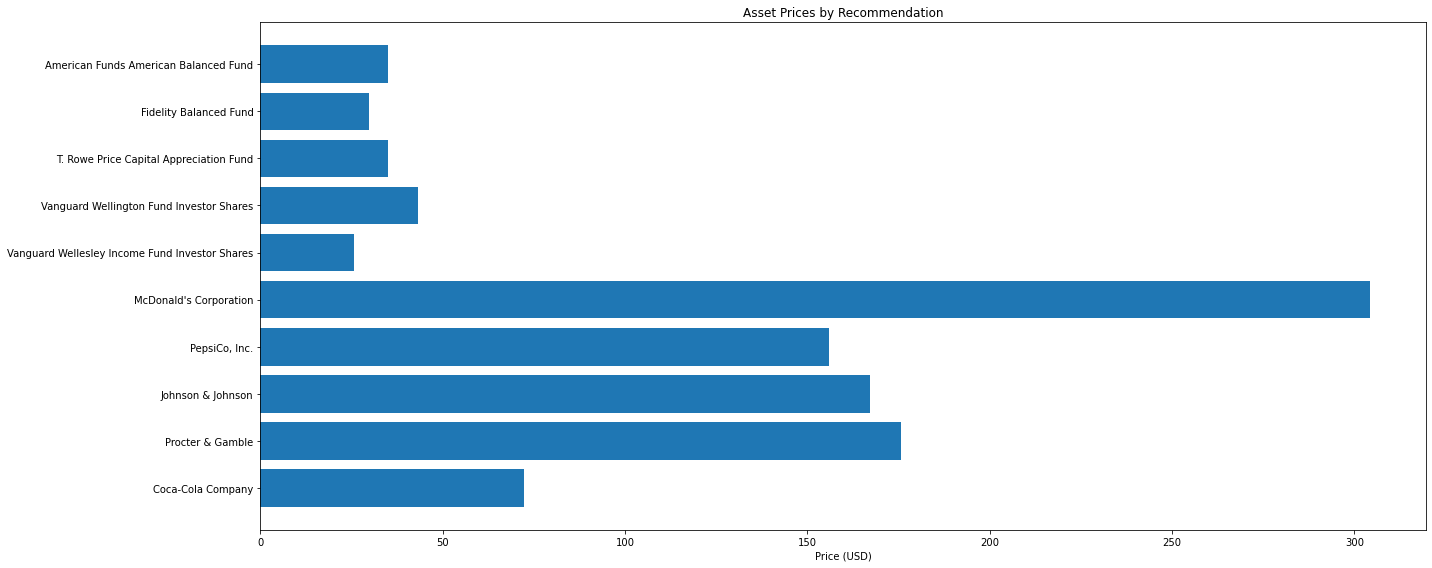

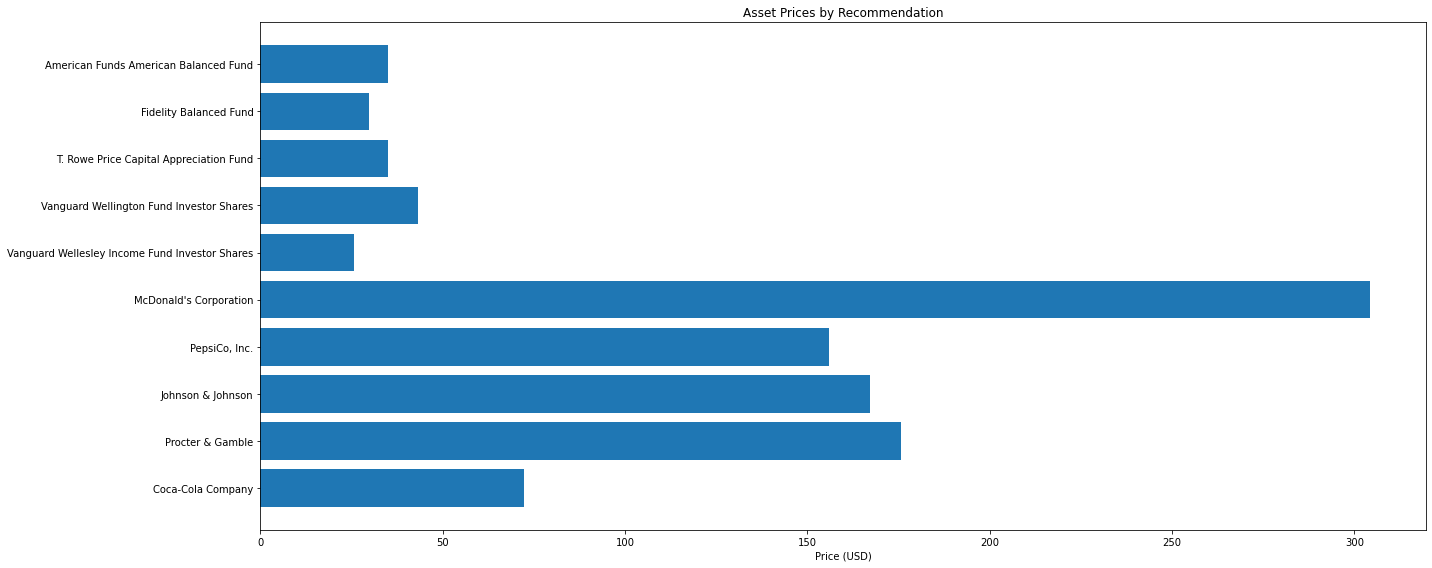

In [1]:
from customtkinter import *
import tkinter as tk
from tkinter import messagebox
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pulp

def get_stock_recommendations(risk_tolerance, return_expectation, diversification):
    stock_categories = {
        ("low", "steady", "balanced"): [
            ("AAPL", "Apple Inc."), 
            ("MSFT", "Microsoft Corporation"), 
            ("JNJ", "Johnson & Johnson"), 
            ("PG", "Procter & Gamble"), 
            ("KO", "Coca-Cola"), 
            ("PEP", "PepsiCo"), 
            ("VZ", "Verizon Communications"), 
            ("T", "AT&T"), 
            ("CL", "Colgate-Palmolive"), 
            ("MCD", "McDonald's Corporation"), 
            ("WMT", "Walmart Inc.")
        ],
        ("medium", "moderate", "balanced"): [
            ("GOOGL", "Alphabet Inc. (Google)"), 
            ("TSLA", "Tesla Inc."), 
            ("NVDA", "NVIDIA Corporation"), 
            ("AMZN", "Amazon.com, Inc."), 
            ("META", "Meta Platforms, Inc. (formerly Facebook)"), 
            ("DIS", "The Walt Disney Company"), 
            ("INTC", "Intel Corporation"), 
            ("CSCO", "Cisco Systems, Inc."), 
            ("PYPL", "PayPal Holdings, Inc."), 
            ("NFLX", "Netflix, Inc.")
        ],
        ("high", "aggressive", "balanced"): [
            ("AMZN", "Amazon.com, Inc."), 
            ("NFLX", "Netflix, Inc."), 
            ("SPCE", "Virgin Galactic Holdings, Inc."), 
            ("RBLX", "Roblox Corporation"), 
            ("TSLA", "Tesla Inc."), 
            ("UBER", "Uber Technologies, Inc."), 
            ("CRWD", "CrowdStrike Holdings, Inc."), 
            ("ZM", "Zoom Video Communications, Inc."), 
            ("SHOP", "Shopify Inc."), 
            ("PLTR", "Palantir Technologies Inc.")
        ],
        ("low", "moderate", "balanced"): [
              ("PG", "Procter & Gamble Co."),
             ("JNJ", "Johnson & Johnson"),
             ("KO", "Coca-Cola Co."),
             ("PEP", "PepsiCo, Inc."),
             ("MCD", "McDonald's Corporation"),
             ("VZ", "Verizon Communications Inc."),
             ("HD", "The Home Depot, Inc."),
             ("UNP", "Union Pacific Corporation"),
             ("DUK", "Duke Energy Corporation")
        ],
        ("low", "aggressive", "balanced"): [
            ("NVDA", "NVIDIA Corporation"),
            ("AMD", "Advanced Micro Devices, Inc."),
            ("TSLA", "Tesla, Inc."),
            ("ABNB", "Airbnb, Inc."),
            ("SQ", "Block, Inc.")
       ],
         ("low", "moderate", "balanced"): [
           ("KO", "Coca-Cola Company"),
           ("PG", "Procter & Gamble"),
           ("JNJ", "Johnson & Johnson"),
           ("PEP", "PepsiCo, Inc."),
           ("MCD", "McDonald's Corporation")
         ],
       ("medium", "steady", "balanced"): [
            ("V", "Visa Inc."),
            ("MA", "Mastercard Incorporated"),
            ("MSFT", "Microsoft Corporation"),
            ("GOOGL", "Alphabet Inc."),
            ("ADBE", "Adobe Inc.")
      ],
      ("medium", "aggressive", "balanced"): [
           ("NFLX", "Netflix, Inc."),
           ("CRM", "Salesforce, Inc."),
           ("SHOP", "Shopify Inc."),
           ("PYPL", "PayPal Holdings, Inc."),
           ("UBER", "Uber Technologies, Inc.")
      ],
      ("high", "steady", "balanced"): [
           ("AAPL", "Apple Inc."),
           ("COST", "Costco Wholesale Corporation"),
           ("UNH", "UnitedHealth Group Incorporated"),
           ("BRK.B", "Berkshire Hathaway Inc."),
           ("LIN", "Linde plc")
    ],
    ("high", "moderate", "balanced"): [
          ("META", "Meta Platforms, Inc."),
          ("AVGO", "Broadcom Inc."),
          ("NOW", "ServiceNow, Inc."),
          ("SNOW", "Snowflake Inc."),
          ("ASML", "ASML Holding N.V.")
    ]     
    }

    stocks = stock_categories.get((risk_tolerance, return_expectation, diversification), [])
    stock_info = []
    stock_prices = []

    if not stocks:
        stock_info.append("No stocks available for this combination of preferences.")
        return stock_info, stock_prices

    for stock, full_name in stocks:
        try:
            data = yf.Ticker(stock).history(period="1d")
            if not data.empty:
                price = data['Close'].iloc[-1]
                stock_info.append(f"{full_name} ({stock}): ${price:.2f}")
                stock_prices.append((full_name, price))
            else:
                stock_info.append(f"{full_name} ({stock}): No data available")
        except Exception as e:
            stock_info.append(f"{full_name} ({stock}): Error retrieving data")
            print(f"Error retrieving {stock}: {e}")

    return stock_info, stock_prices

def get_mutual_fund_recommendations(risk_tolerance, return_expectation, diversification):
    etf_categories = {
        ("low", "steady", "balanced"): [
            ("VTI", "Vanguard Total Stock Market ETF"), 
            ("SPY", "SPDR S&P 500 ETF Trust"), 
            ("IVV", "iShares Core S&P 500 ETF"), 
            ("BND", "Vanguard Total Bond Market ETF"), 
            ("VUG", "Vanguard Growth ETF"), 
            ("VOO", "Vanguard S&P 500 ETF"), 
            ("SCHB", "Schwab U.S. Broad Market ETF"), 
        ],
        ("medium", "moderate", "balanced"): [
            ("VOO", "Vanguard S&P 500 ETF"), 
            ("VTI", "Vanguard Total Stock Market ETF"), 
            ("IWB", "iShares Russell 1000 ETF"), 
            ("SPYG", "SPDR S&P 500 Growth ETF"), 
            ("SCHD", "Schwab U.S. Dividend Equity ETF"), 
            ("VIG", "Vanguard Dividend Appreciation ETF"), 
            ("SCHG", "Schwab U.S. Large-Cap Growth ETF"), 
            ("VYM", "Vanguard High Dividend Yield ETF"), 
        ],
        ("high", "aggressive", "balanced"): [
            ("ARKK", "ARK Innovation ETF"), 
            ("SPY", "SPDR S&P 500 ETF Trust"), 
            ("QQQ", "Invesco QQQ Trust"), 
            ("SCHH", "Schwab U.S. REIT ETF"), 
            ("VUG", "Vanguard Growth ETF"), 
            ("ITOT", "iShares Core S&P Total U.S. Stock Market ETF"), 
            ("VOT", "Vanguard Mid-Cap Growth ETF"), 
            ("IVV", "iShares Core S&P 500 ETF"), 
        ],
        ("low", "aggressive", "balanced"): [
           ("FAGIX", "Fidelity Capital & Income Fund"),
           ("PRNHX", "T. Rowe Price New Horizons Fund"),
           ("VEXPX", "Vanguard Explorer Fund"),
           ("RYVPX", "Rydex S&P MidCap 400 Pure Growth Fund"),
           ("HACAX", "Harbor Capital Appreciation Fund")
    ],
    ("medium", "steady", "balanced"): [
        ("VWINX", "Vanguard Wellesley Income Fund"),
        ("PRWCX", "T. Rowe Price Capital Appreciation Fund"),
        ("FPACX", "FPA Crescent Fund"),
        ("JABAX", "Janus Henderson Balanced Fund"),
        ("ABALX", "American Funds American Balanced Fund")
    ],
     ("low", "moderate", "balanced"): [
       ("VWINX", "Vanguard Wellesley Income Fund Investor Shares"),
       ("VWELX", "Vanguard Wellington Fund Investor Shares"),
       ("PRWCX", "T. Rowe Price Capital Appreciation Fund"),
       ("FBALX", "Fidelity Balanced Fund"),
       ("ABALX", "American Funds American Balanced Fund")      
     ],
    ("medium", "aggressive", "balanced"): [
        ("VWUSX", "Vanguard U.S. Growth Fund"),
        ("TRBCX", "T. Rowe Price Blue Chip Growth Fund"),
        ("FDGRX", "Fidelity Growth Company Fund"),
        ("RPMGX", "T. Rowe Price Mid-Cap Growth Fund"),
        ("POAGX", "Primecap Odyssey Aggressive Growth Fund")
    ],
    ("high", "steady", "balanced"): [
        ("VFINX", "Vanguard 500 Index Fund"),
        ("SWPPX", "Schwab S&P 500 Index Fund"),
        ("FXAIX", "Fidelity 500 Index Fund"),
        ("DIA", "SPDR Dow Jones Industrial Average ETF Trust"),
        ("SPY", "SPDR S&P 500 ETF Trust")
    ],
    ("high", "moderate", "balanced"): [
        ("VIGAX", "Vanguard Growth Index Fund"),
        ("SCHG", "Schwab U.S. Large-Cap Growth ETF"),
        ("IWF", "iShares Russell 1000 Growth ETF"),
        ("QQQ", "Invesco QQQ Trust"),
        ("VUG", "Vanguard Growth ETF")
    ]
    }

    etfs = etf_categories.get((risk_tolerance, return_expectation, diversification), [])
    etf_info = []
    etf_prices = []

    if not etfs:
        etf_info.append("No ETFs available for this combination of preferences.")
        return etf_info, etf_prices

    for etf, full_name in etfs:
        try:
            data = yf.Ticker(etf).history(period="1d")
            if not data.empty:
                price = data['Close'].iloc[-1]
                etf_info.append(f"{full_name} ({etf}): ${price:.2f}")
                etf_prices.append((full_name, price))
            else:
                etf_info.append(f"{full_name} ({etf}): No data available")
        except Exception as e:
            etf_info.append(f"{full_name} ({etf}): Error retrieving data")
            print(f"Error retrieving {etf}: {e}")

    return etf_info, etf_prices

def get_bond_recommendations(risk_tolerance, return_expectation, diversification):
    bond_categories = {
        ("low", "steady", "balanced"): [
            ("BND", "Vanguard Total Bond Market ETF"), 
            ("AGG", "iShares Core U.S. Aggregate Bond ETF"), 
            ("VBTLX", "Vanguard Total Bond Market Index Fund"), 
            ("BIV", "Vanguard Intermediate-Term Bond ETF"), 
            ("BNDX", "Vanguard Total International Bond ETF"), 
            ("TLT", "iShares 20+ Year Treasury Bond ETF"), 
            ("SHY", "iShares 1-3 Year Treasury Bond ETF"), 
            ("IEF", "iShares 7-10 Year Treasury Bond ETF"), 
            ("LQD", "iShares iBoxx $ Investment Grade Corporate Bond ETF"), 
            ("BNDZ", "Vanguard Total Bond Market ETF")
        ],
        ("medium", "moderate", "balanced"): [
            ("SPAB", "SPDR Bloomberg Barclays Investment Grade Bond ETF"), 
            ("SCHP", "Schwab U.S. TIPS ETF"), 
            ("BIV", "Vanguard Intermediate-Term Bond ETF"), 
            ("GOVT", "iShares U.S. Treasury Bond ETF"), 
            ("LQD", "iShares iBoxx $ Investment Grade Corporate Bond ETF"), 
            ("VCSH", "Vanguard Short-Term Corporate Bond ETF"), 
            ("FLOT", "iShares Floating Rate Bond ETF"), 
            ("HYG", "iShares iBoxx $ High Yield Corporate Bond ETF"), 
            ("JNK", "SPDR Bloomberg Barclays High Yield Bond ETF"), 
            ("BSV", "Vanguard Short-Term Bond ETF")
        ],
        ("high", "aggressive", "balanced"): [
            ("HYG", "iShares iBoxx $ High Yield Corporate Bond ETF"), 
            ("JNK", "SPDR Bloomberg Barclays High Yield Bond ETF"), 
            ("SPHY", "SPDR Blackstone/GSO Senior Loan ETF"), 
            ("EMB", "iShares J.P. Morgan USD Emerging Markets Bond ETF"), 
            ("SHYG", "iShares iBoxx $ High Yield Excluding Financials ETF"), 
            ("SJNK", "SPDR Bloomberg Barclays Short-Term High Yield Bond ETF"), 
            ("PFF", "iShares Preferred and Income Securities ETF"), 
            ("PFFR", "iShares Preferred and Income Securities ETF"), 
            ("GSY", "Invesco Ultra Short Duration ETF"), 
            ("VCLT", "Vanguard Long-Term Corporate Bond ETF")
        ],
    ("low", "aggressive", "balanced"): [
        ("HYG", "iShares iBoxx $ High Yield Corporate Bond ETF"),
        ("JNK", "SPDR Bloomberg High Yield Bond ETF"),
        ("ANGL", "VanEck Vectors Fallen Angel High Yield Bond ETF"),
        ("HYLD", "High Yield ETF"),
        ("SHYG", "iShares 0-5 Year High Yield Corporate Bond ETF")
    ],
    ("medium", "steady", "balanced"): [
        ("AGG", "iShares Core U.S. Aggregate Bond ETF"),
        ("BND", "Vanguard Total Bond Market ETF"),
        ("SCHZ", "Schwab U.S. Aggregate Bond ETF"),
        ("LQD", "iShares iBoxx $ Investment Grade Corporate Bond ETF"),
        ("VCIT", "Vanguard Intermediate-Term Corporate Bond ETF")
    ],
    ("medium", "aggressive", "balanced"): [
        ("EMB", "iShares J.P. Morgan USD Emerging Markets Bond ETF"),
        ("PCY", "Invesco Emerging Markets Sovereign Debt ETF"),
        ("VWOB", "Vanguard Emerging Markets Government Bond ETF"),
        ("HYEM", "VanEck Vectors Emerging Markets High Yield Bond ETF"),
        ("EMHY", "iShares Emerging Markets High Yield Bond ETF")
    ],
    ("high", "steady", "balanced"): [
        ("TLT", "iShares 20+ Year Treasury Bond ETF"),
        ("IEF", "iShares 7-10 Year Treasury Bond ETF"),
        ("VGLT", "Vanguard Long-Term Treasury ETF"),
        ("EDV", "Vanguard Extended Duration Treasury ETF"),
        ("ZROZ", "PIMCO 25+ Year Zero Coupon U.S. Treasury Index ETF")
    ],
    ("low", "moderate", "balanced"): [
            ("AGG", "iShares Core U.S. Aggregate Bond ETF"),
            ("BND", "Vanguard Total Bond Market ETF"),
            ("VBTLX", "Vanguard Total Bond Market Index Fund"),
             ("SCHZ", "Schwab U.S. Aggregate Bond ETF"),
             ("LQD", "iShares iBoxx $ Investment Grade Corporate Bond ETF")
        ],
        ("high", "moderate", "balanced"): [
           ("MUB", "iShares National Muni Bond ETF"),
           ("VTEB", "Vanguard Tax-Exempt Bond ETF"),
           ("TFI", "SPDR Nuveen Bloomberg Barclays Municipal Bond ETF"),
           ("ITM", "VanEck Vectors AMT-Free Intermediate Municipal Index ETF"),
           ("SUB", "iShares Short-Term National Muni Bond ETF")
    ]
    }

    bonds = bond_categories.get((risk_tolerance, return_expectation, diversification), [])
    bond_info = []
    bond_prices = []

    if not bonds:
        bond_info.append("No bonds available for this combination of preferences.")
        return bond_info, bond_prices

    for bond, full_name in bonds:
        try:
            data = yf.Ticker(bond).history(period="1d")
            if not data.empty:
                price = data['Close'].iloc[-1]
                bond_info.append(f"{full_name} ({bond}): ${price:.2f}")
                bond_prices.append((full_name, price))
            else:
                bond_info.append(f"{full_name} ({bond}): No data available")
        except Exception as e:
            bond_info.append(f"{full_name} ({bond}): Error retrieving data")
            print(f"Error retrieving {bond}: {e}")

    return bond_info, bond_prices


import yfinance as yf

def get_crypto_recommendations(risk_tolerance, return_expectation, diversification):
    crypto_categories = {
        
        ("low", "steady", "balanced"): [
            ("BTC-USD", "Bitcoin"), 
            ("ETH-USD", "Ethereum"), 
            ("USDT-USD", "Tether"), 
            ("USDC-USD", "USD Coin"), 
            ("BUSD-USD", "Binance USD")
        ],
        ("low", "moderate", "balanced"): [
            ("DAI-USD", "Dai"),
            ("BUSD-USD", "Binance USD"),
            ("TUSD-USD", "TrueUSD"),
            ("PAXG-USD", "Pax Gold"),
            ("WBTC-USD", "Wrapped Bitcoin")
        ],
        ("medium", "moderate", "balanced"): [
            ("BNB-USD", "Binance Coin"), 
            ("XRP-USD", "XRP"), 
            ("ADA-USD", "Cardano"), 
            ("DOGE-USD", "Dogecoin"), 
            ("MATIC-USD", "Polygon")
        ],
        ("high", "aggressive", "balanced"): [
            ("SOL-USD", "Solana"), 
            ("DOT-USD", "Polkadot"), 
            ("AVAX-USD", "Avalanche"), 
            ("LINK-USD", "Chainlink"), 
            ("UNI-USD", "Uniswap")
        ],
        ("low", "aggressive", "balanced"): [
            ("LTC-USD", "Litecoin"),
            ("BCH-USD", "Bitcoin Cash"),
            ("XLM-USD", "Stellar"),
            ("ATOM-USD", "Cosmos"),
            ("ETC-USD", "Ethereum Classic")
        ],
        ("medium", "steady", "balanced"): [
            ("ALGO-USD", "Algorand"),
            ("VET-USD", "VeChain"),
            ("HBAR-USD", "Hedera"),
            ("ICP-USD", "Internet Computer"),
            ("GRT-USD", "The Graph")
        ],
        ("medium", "aggressive", "balanced"): [
            ("SAND-USD", "The Sandbox"),
            ("MANA-USD", "Decentraland"),
            ("AXS-USD", "Axie Infinity"),
            ("FTM-USD", "Fantom"),
            ("RUNE-USD", "THORChain")
        ],
        ("high", "steady", "balanced"): [
            ("NEAR-USD", "Near Protocol"),
            ("FIL-USD", "Filecoin"),
            ("EOS-USD", "EOS"),
            ("XTZ-USD", "Tezos"),
            ("AAVE-USD", "Aave")
        ],
        ("high", "moderate", "balanced"): [
            ("ENS-USD", "Ethereum Name Service"),
            ("LUNA-USD", "Terra"),
            ("GALA-USD", "Gala"),
            ("ANKR-USD", "Ankr"),
            ("CRO-USD", "Crypto.com Coin")
        ]
    }
    cryptos = crypto_categories.get((risk_tolerance, return_expectation, diversification), [])
    crypto_info = []
    crypto_prices = []

    if not cryptos:
        crypto_info.append("No cryptocurrencies available for this combination of preferences.")
        return crypto_info, crypto_prices

    for crypto, full_name in cryptos:
        try:
            data = yf.Ticker(crypto).history(period="1d")
            if not data.empty:
                price = data['Close'].iloc[-1]
                crypto_info.append(f"{full_name} ({crypto}): ${price:.2f}")
                crypto_prices.append((full_name, price))
            else:
                crypto_info.append(f"{full_name} ({crypto}): No data available")
        except Exception as e:
            crypto_info.append(f"{full_name} ({crypto}): Error retrieving data")
            print(f"Error retrieving {crypto}: {e}")

    return crypto_info, crypto_prices

def get_portfolio_recommendation(portfolio_types, risk_tolerance, return_expectation, diversification):
    assets = {
        "stocks": get_stock_recommendations,
        "mutual funds": get_mutual_fund_recommendations,
        "crypto":get_crypto_recommendations,
        "bonds": get_bond_recommendations
    }

    selected_recommendations = []
    all_prices = []

    for portfolio_type in portfolio_types:
        fetch_func = assets.get(portfolio_type.lower())
        if fetch_func:
            if portfolio_type == "stocks":
                stock_info, stock_prices = fetch_func(risk_tolerance, return_expectation, diversification)
                selected_recommendations.extend(stock_info)
                all_prices.extend(stock_prices)
            elif portfolio_type == "mutual funds":
                mf_info, mf_prices = fetch_func(risk_tolerance, return_expectation, diversification)
                selected_recommendations.extend(mf_info)
                all_prices.extend(mf_prices)
            elif portfolio_type == "crypto":
                crypto_info, crypto_prices = fetch_func(risk_tolerance, return_expectation, diversification)
                selected_recommendations.extend(crypto_info)
                all_prices.extend(crypto_prices)
            elif portfolio_type == "bonds":
                bond_info, bond_prices = fetch_func(risk_tolerance, return_expectation, diversification)
                selected_recommendations.extend(bond_info)
                all_prices.extend(bond_prices)

    return selected_recommendations, all_prices

def plot_all_prices(all_prices):
    if not all_prices:
        messagebox.showinfo("No Data", "No data available to plot.")
        return

    # Separate names and prices
    names, prices = zip(*all_prices)
    
    # Create a new Toplevel window for the plot
    plot_window = CTkToplevel(root)
    plot_window.title("Asset Price Plot")
    plot_window.geometry("2000x1200")  # Set size of the new window as desired

    # Create the plot
    fig, ax = plt.subplots(figsize=(20, 8))  # Adjust the figure size
    ax.barh(names, prices)  # Horizontal bar chart for better readability
    ax.set_xlabel('Price (USD)')
    ax.set_title('Asset Prices by Recommendation')
    
    plt.tight_layout()

    # Embed the plot in the new window using FigureCanvasTkAgg
    canvas = FigureCanvasTkAgg(fig, master=plot_window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
    # Optionally, add a close button
    close_button = CTkButton(plot_window, text="Close", command=plot_window.destroy)
    close_button.pack(pady=10)

def optimize_portfolio(all_prices, budget):
    """
    Optimize the portfolio allocation using linear programming.
    :param all_prices: List of tuples containing asset names and prices.
    :param budget: Total budget to allocate.
    :return: Dictionary of optimized allocations.
    """
    # Create a LP problem
    prob = pulp.LpProblem("Portfolio_Optimization", pulp.LpMaximize)

    # Define decision variables (amount to invest in each asset)
    asset_vars = pulp.LpVariable.dicts("Asset", [name for name, _ in all_prices], lowBound=0, cat='Continuous')

    # Objective function: Maximize the number of assets (diversification)
    prob += pulp.lpSum([asset_vars[name] for name, _ in all_prices])

    # Constraints
    # 1. Total investment should not exceed the budget
    prob += pulp.lpSum([asset_vars[name] * price for name, price in all_prices]) <= budget

    # 2. Each asset should have at least a minimum allocation (e.g., 5% of the budget)
    min_allocation = 0.05 * budget
    for name, price in all_prices:
        prob += asset_vars[name] * price >= min_allocation

    # Solve the problem
    prob.solve()

    # Extract the results
    allocations = {}
    for name, price in all_prices:
        allocations[name] = asset_vars[name].varValue * price

    return allocations

min_budget = 1000  # Set your minimum budget
max_budget = 1000000 # Set your maximum budget (adjust as needed)

def show_recommendations():
    selected_portfolios = [key for key, var in portfolio_vars.items() if var.get()]
    risk_tolerance = risk_var.get()
    return_expectation = return_var.get()
    diversification = diversification_var.get()
    recommendations, all_prices = get_portfolio_recommendation(selected_portfolios, risk_tolerance, return_expectation, diversification)
    
    try:
        budget_str = budget_entry.get()
        if not budget_str: # Check if the entry is empty
            raise ValueError("Budget cannot be empty.")

        budget = float(budget_str)

        min_budget = 1000  # Set your minimum budget
        max_budget = 1000000 # Set your maximum budget (adjust as needed)

        if budget < min_budget or budget > max_budget:
            raise ValueError(f"Budget must be between ${min_budget} and ${max_budget}.")

    except ValueError as e:
        messagebox.showerror("Error", str(e))
        return  # Exit if budget is invalid
    
    if not recommendations:
        recommendations.append("No recommendations available for your selected preferences.")
    
    # Show recommendations in a message box
    messagebox.showinfo("Investment Recommendations", "\n".join(recommendations))

    # Plot the asset prices for all portfolio types
    plot_all_prices(all_prices)

    # Optimize the portfolio allocatio
    optimized_allocations = optimize_portfolio(all_prices, budget)

    # Display the optimized allocations
    allocation_message = "Optimized Portfolio Allocation:\n"
    for asset, amount in optimized_allocations.items():
        allocation_message += f"{asset}: ${amount:.2f}\n"
    messagebox.showinfo("Optimized Portfolio Allocation", allocation_message)
    
# GUI Setup
root = CTk()
root.title("Portfolio Recommender")
root.geometry("600x600")  # Adjusted size for better layout

# Title Label
CTkLabel(root, text="Portfolio Recommender", font=("Arial", 24)).pack(pady=20)

# Portfolio Types Section
CTkLabel(root, text="Select Portfolio Types:", font=("Arial", 16)).pack(pady=(10, 5))
portfolio_vars = {}
portfolio_options = ["stocks", "mutual funds", "crypto", "bonds"]
for option in portfolio_options:
    var = tk.BooleanVar()
    checkbox = CTkCheckBox(root, text=option.capitalize(), variable=var, corner_radius=36)
    checkbox.pack(anchor='w', padx=20)  # Align checkboxes to the left
    portfolio_vars[option] = var

# Risk Tolerance Section
CTkLabel(root, text="Select Risk Tolerance:", font=("Arial", 16)).pack(pady=(10, 5))
risk_var = tk.StringVar(value="medium")  # Default risk tolerance
CTkOptionMenu(root, variable=risk_var, values=["low", "medium", "high"]).pack(pady=5)

# Return Expectation Section
CTkLabel(root, text="Select Return Expectation:", font=("Arial", 16)).pack(pady=(10, 5))
return_var = tk.StringVar(value="moderate")  # Default return expectation
CTkOptionMenu(root, variable=return_var, values=["steady", "moderate", "aggressive"]).pack(pady=5)

# Diversification Preference Section
CTkLabel(root, text="Select Diversification Preference:", font=("Arial", 16)).pack(pady=(10, 5))
diversification_var = tk.StringVar(value="balanced")  # Default diversification
CTkOptionMenu(root, variable=diversification_var, values=["balanced", "focused"]).pack(pady=5)

# Budget Entry Section with Min/Max hints
CTkLabel(root, text=f"Enter Budget (${min_budget} - ${max_budget}):", font=("Arial", 16)).pack(pady=(10, 5))
budget_entry = CTkEntry(root, placeholder_text="Enter budget") # Removed the placeholder text as it's now in the label
budget_entry.pack(pady=5)

# Get Recommendations Button
CTkButton(root, text="Get Recommendations", command=show_recommendations, width=200).pack(pady=20)

# Automatically show recommendations when the app starts
root.after(100, lambda: show_recommendations(
    selected_portfolios=["stocks", "mutual funds", "crypto", "bonds"],  # Default portfolios
    risk_tolerance="medium",  # Default risk tolerance
    return_expectation="moderate",  # Default return expectation
    diversification="balanced"  # Default diversification
))

# Run the application
root.mainloop()